### KORELASYON

**Korelasyon analizi;** değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatiksel bir yöntemdir.

İki ya da daha çok değişken arasındaki ilişkinin matematiksel bağıntısı **“Regresyon Analizi”** ile ilişkinin yönü ve derecesi ise** “Korelasyon Analizi”** ile incelenir.


**Korelasyon katsayısı**, bağımlı değişken ile bağımsız değişkenler arasındaki ilişkinin gücünü gösteren bir katsayıdır. Örneğin; öğrencinin ders çalışma süresi ile aldığı istatistik notu arasında ilişki olup olmadığını veya borsada işlem gören bir hisse senedinin belli bir dönemdeki günlük getirisi (X) ile içinde yer aldığı bir endeksin günlük getirisi (Y) arasındaki ilişki korelasyon katsayısı ile incelenebilir. Korelasyon katsayısı değişkenlerin yönü ve etkileşimlerin nasıl olduğu hakkında bilgi verir. **Katsayı -1 ≤ r ≤1 **arasındadır.

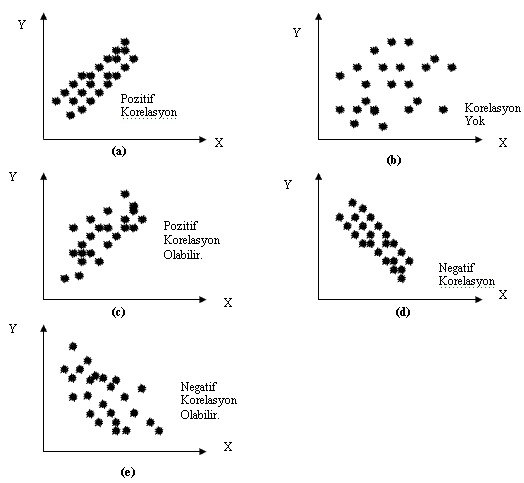

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data.xlsx')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12161 entries, 0 to 12160
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CNT         12161 non-null  object 
 1   ST004D01T   12161 non-null  int64  
 2   ESCS        12161 non-null  float64
 3   UNDREM      12161 non-null  float64
 4   METASUM     12161 non-null  float64
 5   METASPAM    12161 non-null  float64
 6   ICTHOME     12161 non-null  int64  
 7   ICTSCH      12161 non-null  int64  
 8   HOMEPOS     12161 non-null  float64
 9   CULTPOSS    12161 non-null  float64
 10  HEDRES      12161 non-null  float64
 11  WEALTH      12161 non-null  float64
 12  ICTRES      12161 non-null  object 
 13  DISCLIMA    12161 non-null  float64
 14  TEACHSUP    12161 non-null  float64
 15  DIRINS      12161 non-null  float64
 16  PERFEED     12161 non-null  float64
 17  EMOSUPS     12161 non-null  float64
 18  STIMREAD    12161 non-null  float64
 19  ADAPTIVITY  12161 non-nul

In [2]:
# korelasyon matrisi 

df.corr()

,ST004D01T,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY
ST004D01T,1.000000,0.016189,-0.187779,-0.202516,-0.111445,0.094831,0.083979,-0.004832,-0.063414,0.007449,0.034531,-0.041502,0.013683,0.043618,0.074719,-0.077036,-0.033852,-0.027106
ESCS,0.016189,1.000000,0.205356,0.264177,0.190995,0.414016,0.065012,0.792594,0.602296,0.452327,0.678974,-0.002968,0.042579,-0.046229,0.043794,0.224033,0.043090,0.071944
UNDREM,-0.187779,0.205356,1.000000,0.489682,0.347171,-0.009269,-0.084147,0.150092,0.163721,0.106487,0.073299,0.106791,0.035951,-0.040861,-0.001820,0.144286,0.069046,0.064023
METASUM,-0.202516,0.264177,0.489682,1.000000,0.422267,0.005288,-0.081555,0.200435,0.196043,0.077762,0.132943,0.067910,0.044899,-0.075159,-0.043852,0.167058,0.028954,0.054121
METASPAM,-0.111445,0.190995,0.347171,0.422267,1.000000,-0.029023,-0.028099,0.174769,0.165748,0.048187,0.125088,0.079107,0.036446,-0.075837,-0.017115,0.093732,0.037742,0.069823
ICTHOME,0.094831,0.414016,-0.009269,0.005288,-0.029023,1.000000,0.289391,0.495320,0.304210,0.333098,0.478822,-0.011091,0.006567,0.003854,0.055938,0.057535,-0.000096,0.009556
ICTSCH,0.083979,0.065012,-0.084147,-0.081555,-0.028099,0.289391,1.000000,0.176657,0.089663,0.089777,0.201923,0.023976,0.061980,0.048313,0.099357,-0.016494,0.059387,0.063954
HOMEPOS,-0.004832,0.792594,0.150092,0.200435,0.174769,0.495320,0.176657,1.000000,0.748740,0.580247,0.860032,0.030691,0.050534,-0.025327,0.099307,0.212870,0.076584,0.099272
CULTPOSS,-0.063414,0.602296,0.163721,0.196043,0.165748,0.304210,0.089663,0.748740,1.000000,0.440947,0.431413,0.046048,0.055430,0.009808,0.095647,0.188943,0.097617,0.092473
HEDRES,0.007449,0.452327,0.106487,0.077762,0.048187,0.333098,0.089777,0.580247,0.440947,1.000000,0.326579,0.111709,0.082356,0.100662,0.158170,0.199105,0.165406,0.116140


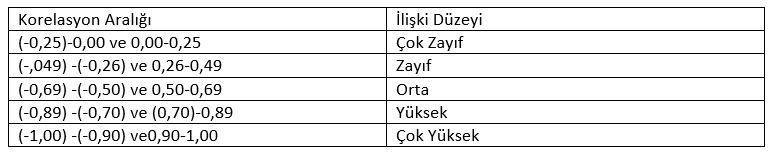

##Spearman Korelasyonu:

In [6]:
df['ICTSCH'].corr(df['ST004D01T'], method='spearman')

0.09963470403139264

In [9]:
# Spearman's Rho

from scipy.stats import spearmanr

spearmanr(df['ICTSCH'], df['ST004D01T'])

SpearmanrResult(correlation=0.09963470403139264, pvalue=3.2826813650971958e-28)



İstatistik analizi uygulamalarında verilerimiz nicel veya sıralayıcı (ordinal) ölçeğe sahip olduğunda **Spearman korelasyon** analizine başvurabiliriz.

**Spearman korelasyon **analizi, normal dağılım koşulunu gerektirmediği için son derece esnek bir tekniktir. Ancak parametrik olmayan tüm analizlerin bir bedeli var. Pratik istatistik analizi uygulamalarında **Spearman korelasyon** katsayıları bağlamında olası problemlere hazır olmalıyız.

ICTSCH ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulunmamıştır (p>.05).

In [11]:
p = 3.2826813650971958e-28
if ( p >.05 ):
  print("ICTSCH ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulunmamıştır ")
else:
  print("ICTSCH ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulundu..!")


ICTSCH ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulundu..!


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['CNT'] = le.fit_transform(df['CNT'])

In [17]:
df.head(1500)

,CNT,ST004D01T,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY
0,0,1,1.3151,1.50,0.59,0.42,11,9,2.2767,1.1953,1.1793,2.3106,1.8669,2.0345,1.3140,1.8202,2.0165,0.6402,0.8980,0.5464
1,0,2,1.3151,1.50,-0.18,1.33,9,7,1.2442,2.0078,1.1793,0.4222,0.0595,1.0294,-0.6262,-0.5066,0.5121,0.2127,0.5135,0.4572
2,0,1,1.3152,0.80,0.98,0.42,9,4,1.2414,1.9141,1.1793,0.2830,0.333,-2.0985,0.0297,-0.4616,0.7743,1.0346,-0.2336,-0.1687
3,0,1,1.3152,-0.25,0.59,0.87,11,8,1.7578,1.5917,1.1793,1.0705,2.6563,0.4922,-0.8998,-1.0493,0.2012,1.0346,0.0236,-0.1716
4,0,2,1.3152,-0.25,0.59,1.33,8,9,1.2395,1.3941,1.1793,1.0975,0.3692,0.3529,1.3140,0.6532,0.9044,-0.6576,-0.2336,1.3230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,2,-0.0037,0.45,-1.72,0.42,6,0,-2.0350,-1.3323,-2.2805,-1.4001,-1.7005,0.9134,1.3140,1.8202,-0.3253,-0.6576,2.0871,2.0073
1496,1,2,-0.0030,1.15,1.36,-0.04,8,5,-0.7930,-0.0388,-1.9183,-0.6107,-0.6068,-1.0963,-0.3673,-0.6406,-1.2560,-0.6576,-0.9225,0.1067
1497,1,2,-0.0028,-1.64,-1.72,-1.41,10,7,0.2178,1.9373,1.1793,-0.4422,-0.4985,-0.7049,1.3140,1.8202,0.6398,-0.6576,0.1214,-2.2652
1498,1,1,-0.0023,1.50,0.98,1.33,4,3,-1.2082,-1.3323,-1.3835,-0.5374,-1.7779,-0.1464,0.1274,-1.0499,-1.6391,0.2169,-1.6579,-1.4537


In [19]:
# Spearman's Rho

from scipy.stats import spearmanr

spearmanr(df['CNT'], df['ST004D01T'])

SpearmanrResult(correlation=-0.0035963016637775885, pvalue=0.6916996236648878)

In [21]:
pvalue=0.6916996236648878
if ( pvalue >.05 ):
  print("CNT ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulunmamıştır ")
else:
  print("CNT ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulundu..!")

CNT ve ST004D01T değişkenleri arasındaki ilişki istatistiksel açıdan anlamlı bulunmamıştır 


## Veri setine göre en yüksek korelasyon çiftleri

In [26]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()

ST004D01T  ST004D01T    1.000000
WEALTH     HOMEPOS      0.860032
HOMEPOS    ESCS         0.792594
CULTPOSS   HOMEPOS      0.748740
ESCS       WEALTH       0.678974
                          ...   
ICTSCH     METASUM     -0.081555
UNDREM     ICTSCH      -0.084147
ST004D01T  METASPAM    -0.111445
UNDREM     ST004D01T   -0.187779
METASUM    ST004D01T   -0.202516
Length: 154, dtype: float64

In [38]:
# x=WEALTH     y = HOMEPOS  linear regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('linear.xlsx') 
X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, :-1].values


In [48]:
X = X.reshape(-1,1)

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [51]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [52]:
# Predicting the Test set results
Y_pred = regressor.predict(X_test)

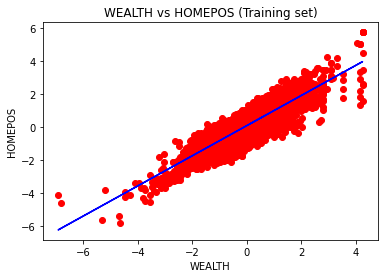

In [53]:

# Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('WEALTH vs HOMEPOS (Training set)')
plt.xlabel('WEALTH')
plt.ylabel('HOMEPOS')
plt.show()

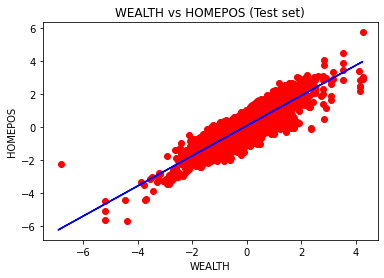

In [54]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('WEALTH vs HOMEPOS (Test set)')
plt.xlabel('WEALTH')
plt.ylabel('HOMEPOS')
plt.show()

In [61]:
# Predicting a new result with Linear Regression
X = [2.3106]
X = np.array(X)
X = X.reshape(-1,1)
Y_pred = regressor.predict(X)
print(Y_pred)

[[2.21462187]]
